<a id='top'></a>

# Analysis for a big online store. 

Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.

We need to: 
- prioritize these hypotheses, 
- launch an A/B test, and 
- analyze the results. 

## Contents:

[Part 1. Prioritizing Hypotheses](#pt1)

[Part 2. A/B Test Analysis](#pt2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[0. Load and prepare data](#0)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1. Graph cumulative revenue by group. Make conclusions and conjectures.](#1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2. Graph cumulative average order size by group. Make conclusions and conjectures.](#2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.](#3)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.](#4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.](#5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.](#6)
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7. Plot a scatter chart of order prices. Make conclusions and conjectures.](#7)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.](#8)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.](#9)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.](#10)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.](#11)
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.](#12)  
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[13. Make a decision based on the test results.](#13)     


<a id="pt1"></a>

## Part 1. Prioritizing Hypotheses
The file *hypotheses_us.csv* contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
The task is to:

- Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

[🔝 To contents](#top)

In [1]:
# Make all necessary imports
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math as mth
import datetime as dt
from IPython.display import HTML

In [2]:
# Load hypotheses
hyps = pd.read_csv('hypotheses_us.csv',sep=';')

In [3]:
# Set styles to display long names and make alignment to the left
pd.set_option('max_colwidth', 100)
style = '''<style>.dataframe td { text-align: left; }
.dataframe thead tr th { text-align: center; }
</style>'''

# Display the data frame 
HTML( style + hyps.to_html( ) )


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [4]:
# Let's apply ICE framework
hyps['ICE'] = (hyps['Impact']*hyps['Confidence'])/hyps['Effort']
hyps.loc[:,['Hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products ...,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [5]:
# Let's apply RICE framework
hyps['RICE'] = (hyps['Reach']*hyps['Impact']*hyps['Confidence'])/hyps['Effort']
hyps.loc[:,['Hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products ...,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


### Conclusion

In ICE framework we didn't took into account the Reach parameter so hypotheses ##8,0 were at the top followed by hypotheses ##7, 6, 2.

In RICE framework the Reach parameter for hypotheses ##8,0 is very low (1 and 3) compared to the Reach parameter of hypotheses ##7,2 (10 and 8). 

So the priority has changed in favor to hypotheses ##7, 2 followed by hypotheses ##0, 6, 8. 

But for both frameworks TOP5 hypotheses remained the same though with different order.

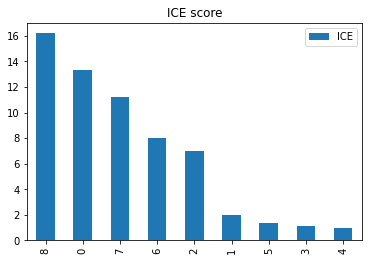

In [6]:
hyps.sort_values(by='ICE',ascending=False).plot(kind='bar', y=['ICE'], title='ICE score')

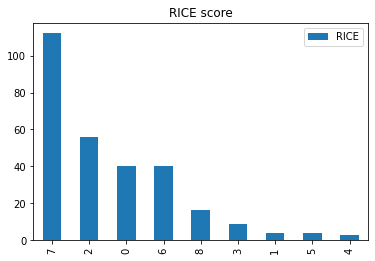

In [7]:
hyps.sort_values(by='RICE',ascending=False).plot(kind='bar', y=[ 'RICE'], title='RICE score')

<a id='pt2'></a>

## Part 2. A/B Test Analysis
We've carried out an A/B test and got the results described in the files *orders_us.csv* and *visits_us.csv*.

**Task:**
Analyze the A/B test.

[🔝 To contents](#top)

<a id='0'></a>

### 0. Load and prepare data

[🔝 To contents](#top)

In [8]:
orders = pd.read_csv('orders_us.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [11]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [12]:
visitors = pd.read_csv('visits_us.csv')
visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 

In [15]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [16]:
# Let's check that there are no users simultaneously belonging to both groups
visitorsA = orders[orders['group']=='A']['visitorId'].unique()
orders.query("(group=='B') & (visitorId in @visitorsA)")['visitorId'].nunique()

58

In [17]:
print("The wrong users share is", 58/len(orders['visitorId'].unique()))


The wrong users share is 0.05625606207565471


We've got 58 users belonging to both groups (which is 5.6% out of all users), so we can't be sure there was no mistake during testing. Let's get rid of incorrect data as the percentage is not that high.

In [18]:
# Get a list of users residing in both groups and exclude them
wrongUsers = orders.query("(group=='B') & (visitorId in @visitorsA)")['visitorId'].unique()
orders = orders.query("(visitorId not in @wrongUsers)")

In [19]:
# Check there's no intersection in groups
orders.query("(group=='B') & (visitorId in @visitorsA)")['visitorId'].nunique()

0

In [20]:
# Check for duplicates in visitors
visitors.duplicated().sum()

0

In [21]:
# Check for duplicates in orders
orders.duplicated().sum()

0

In [22]:
# Check revenue is not negative
orders[orders['revenue']<0]

,transactionId,visitorId,date,revenue,group


In [23]:
# Check visits is not negative
visitors[visitors['visits']<0]

,date,group,visits


In [24]:
#check date distribution for visitors
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [25]:
#check date distribution for orders
orders['date'].describe()

count                    1016
unique                     31
top       2019-08-05 00:00:00
freq                       43
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

### Conclusion

1. We have datasets on visitors and orders without missing values or duplicates.
2. We've converted dates to datetime data type.
3. We've filtered out users belonging to both groups from the orders dataset.
4. Both datasets cover the same time preiod (August).

<a id='1'></a>

### 1. Graph cumulative revenue by group. Make conclusions and conjectures.
[🔝 To contents](#top)

In [26]:
# 1. get date-group pairs from orders
datesGroups = orders[['date','group']].drop_duplicates() 
# 2. getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
# 3. getting aggregated cumulative daily data on visitors 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
# 4. merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


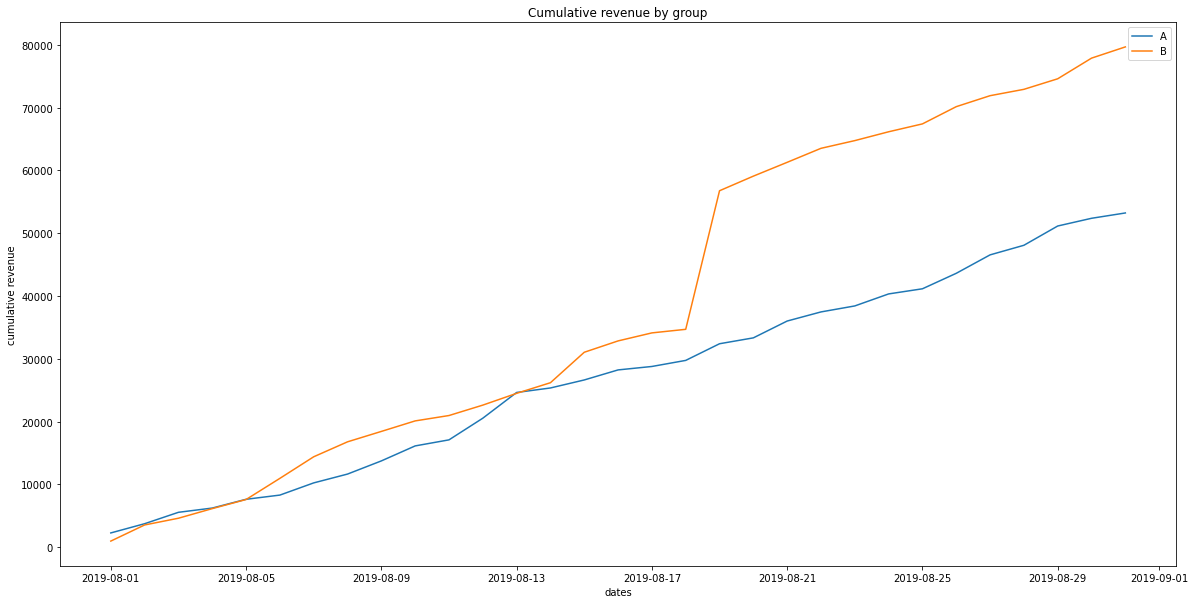

In [27]:
# 5. DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# 6. DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# 7. Plotting the group A revenue graph 
plt.figure(figsize=(20, 10))
plt.title("Cumulative revenue by group")
plt.xlabel('dates')
plt.ylabel('cumulative revenue')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', )

# 8. Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

### Conclusions

Revenue is rising steadily throughout the whole test. 
However, group B sees a spike in revenue at a certain point (between 18 and 20 August). This may imply either a surge in the number of orders or the presence of very expensive orders in the sample. 

<a id='2'></a>

### 2. Graph cumulative average order size by group. Make conclusions and conjectures.
[🔝 To contents](#top)

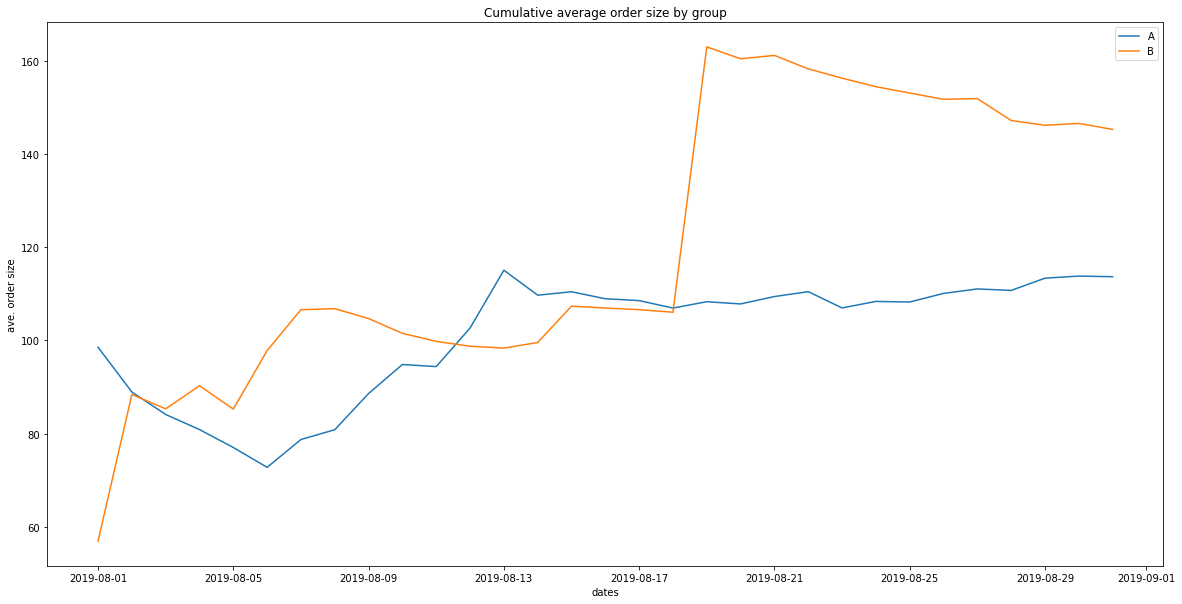

In [28]:
# 1. Plotting the group A average order size graph 
plt.figure(figsize=(20, 10))
plt.title("Cumulative average order size by group")
plt.xlabel('dates')
plt.ylabel('ave. order size')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# 2. Plotting the group B average order size graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

### Conclusions

Average purchase size becomes steady by the end of the test: it stabilizes for group A and keeps on falling for group B. The surge in group B in the middle of the test (18-20 August spike) may have been due to the presence of large, expensive orders. We need to go deeper into data on this group to find the true average purchase size and establish its level. 

<a id='3'></a>

### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
[🔝 To contents](#top)

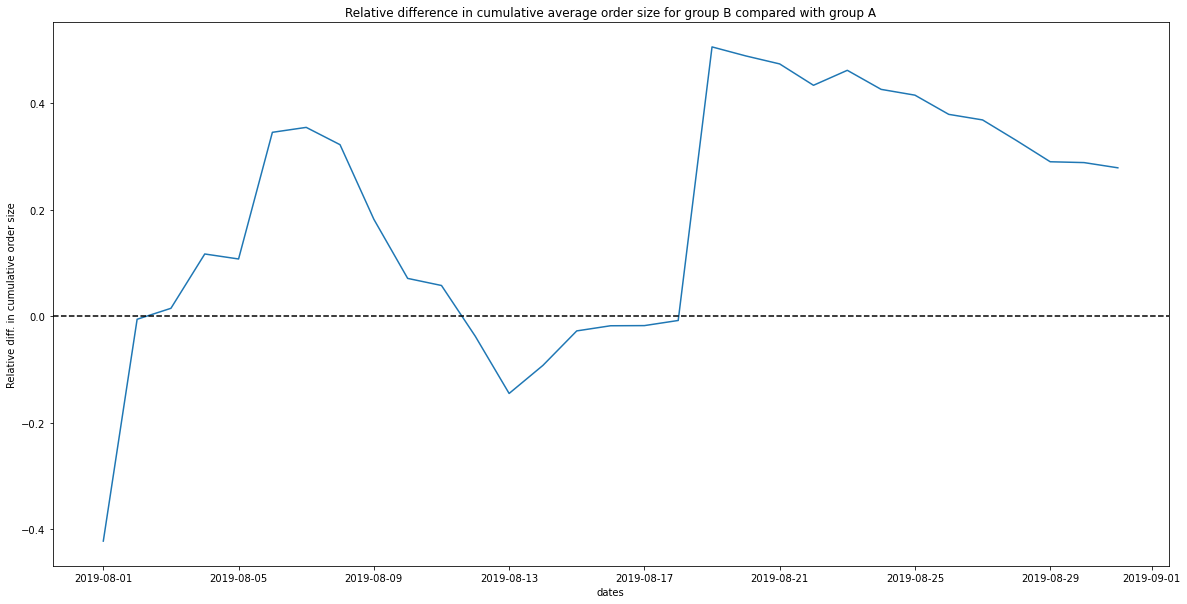

In [29]:
# 1. gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# 2. plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(20, 10))
plt.title("Relative difference in cumulative average order size for group B compared with group A")
plt.xlabel('dates')
plt.ylabel('Relative diff. in cumulative order size')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

### Conclusions

At several points (5-9 August, 13, 18-20 August) the difference between the segments spikes. This means there must be some big orders and outliers!

<a id='4'></a>

### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
[🔝 To contents](#top)

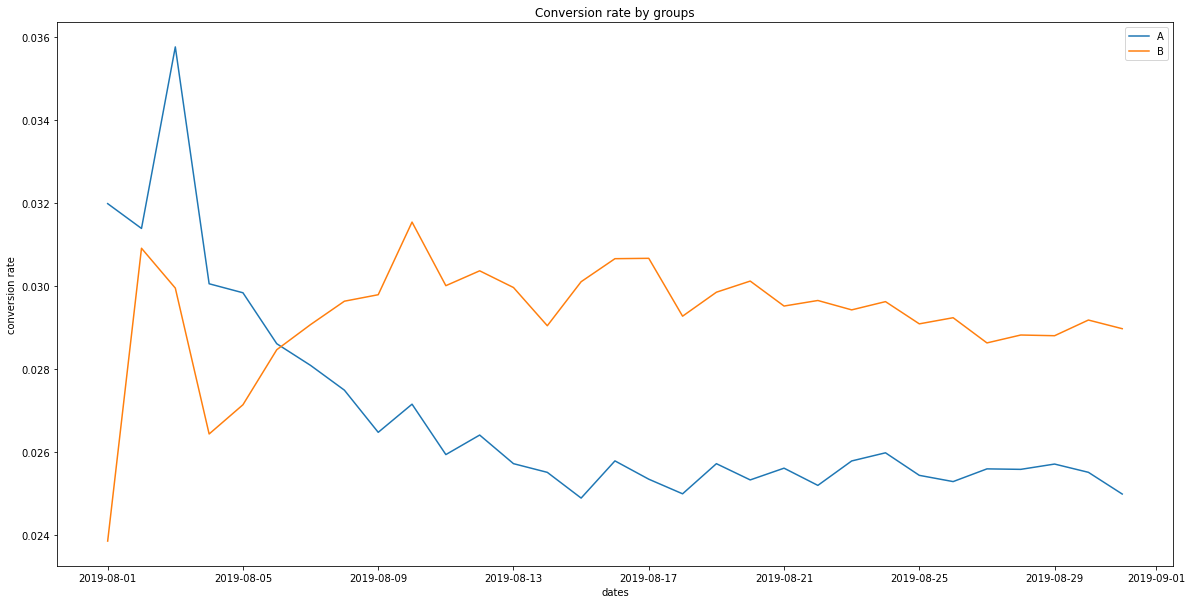

In [32]:
# 1. calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# 2. selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# 3. selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# 4. plotting the graphs
plt.figure(figsize=(20, 10))
plt.title("Conversion rate by groups")
plt.xlabel('dates')
plt.ylabel('conversion rate')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
# setting the axes' scale
#plt.axis(['2019-08-01', '2019-09-01', 0, 0.04]) 
plt.legend()

### Conclusions

During the first several days the groups were fluctuating, but then the conversion rate of group B rose before stabilizing, while the conversion rate of group A dropped but then stabilized, too. Starting from 7-8 August group B took the lead and remained the leader till the end of the test.

<a id='5'></a>

### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
[🔝 To contents](#top)

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


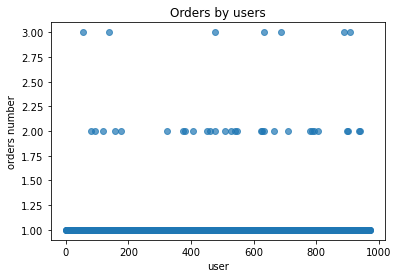

In [33]:
# 1. Leave only necessary columns: userId and the number of orders
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
# 2. Rename columns
ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 

# 3. Plot a scatter chart
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title("Orders by users")
plt.xlabel('user')
plt.ylabel('orders number')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.7) 


### Conclusions

Mostly people made only one order, there are also a few people who made 2 or 3 orders. We need to understand the percentage of such peaple to make a decision on the outliers.

<a id='6'></a>

### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
[🔝 To contents](#top)

In [34]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


### Conclusions

Not more than 1% of users placed more than 2 orders, and not more than 5% of users made more than one order.
Thus, it would be reasonable to set two orders per user as the lower limit for the number of orders and to filter anomalies on that basis. 

<a id='7'></a>

### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.
[🔝 To contents](#top)

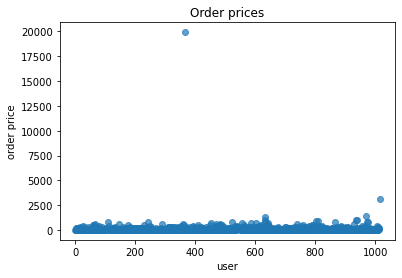

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title("Order prices")
plt.xlabel('user')
plt.ylabel('order price')
plt.scatter(x_values, orders['revenue'], alpha=0.7) 

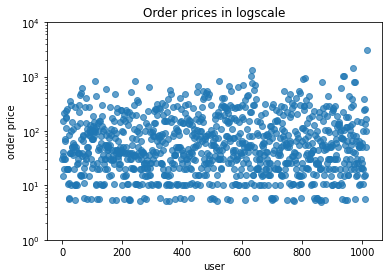

In [36]:
plt.title("Order prices in logscale")
plt.xlabel('user')
plt.ylabel('order price')
plt.yscale('log')
plt.ylim( (10**0,10**4) )
plt.scatter(x_values, orders['revenue'], alpha=0.7) 

### Conclusions

There are several big orders. Based on the graph, we can set the lower limit for abnormal orders to $1,500. However, generally, the most extreme 1-5% of observed values are filtered out. Let's check it more accurately.

<a id='8'></a>

### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
[🔝 To contents](#top)

In [37]:
print(np.percentile(orders['revenue'], [ 95, 99]))

[414.275 830.3  ]


### Conclusions

Not more than 5% of orders cost more than ~414 dollars, and not more than 1% cost more than ~830 dollars. So it's reasonable to filter out all expensive orders with cost more than 830 dollars.

<a id='9'></a>

### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
[🔝 To contents](#top)


We'll test the following hypotheses:

**H0:**  There's no difference in conversion between the groups.
    
**H1:**  There's a difference in conversion between the groups.

But first let's decide which test to use. Let's test the normality of the distribution.

Let's dive into sampleA and sampleB distributions to understand which statistical test to apply. T-test has a limitation: it can be applied to normal distributions.
So, we're going to make a normality test (Shapiro). 

**H0:** the sample is taken from a normally distributed population, 

**H1:** the population is not normally distributed.

If it's not successful we need alternatives such as u-test which is agnostic to normality.


In [39]:
alpha = .05

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Make a Shapiro normality test
results = st.shapiro(sampleA)
p_value = results[1] 
if (p_value < alpha):
    print("Sample A. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample A. Failed to reject the null hypothesis: the distribution seems to be normal") 
    
results = st.shapiro(sampleB)
p_value = results[1] 
if (p_value < alpha):
    print("Sample B. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample B. Failed to reject the null hypothesis: the distribution seems to be normal")     

Sample A. Null hypothesis rejected: the distribution is not normal
Sample B. Null hypothesis rejected: the distribution is not normal


C:\Users\J\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
# Let's look at statistical parameters for each sample
sampleA.describe()

count    18736.000000
mean         0.024979
std          0.165363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: orders, dtype: float64

In [41]:
sampleB.describe()

count    18916.000000
mean         0.028970
std          0.174524
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: orders, dtype: float64

The sample sizes are almost equal and satisfy the u-test condition (boths are >20 observations).
Both distributions are skewed to the right (at least 75% of zeros, mean > median) and the standard deviations are almost 10 times more than the mean values. 
For such a distribution type we need a u-test.
Below let's repeat such checks for the other samples.

In [42]:
print("p-value is {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("The relative conversion gain {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


p-value is 0.006
The relative conversion gain 0.160


### Conclusions

Based on the raw data, there is a difference between groups A and B. 
The p-value (0.006) is considerably lower than 0.05, so we reject the null hypothesis. The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 16%. 

<a id='10'></a>

### 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
[🔝 To contents](#top)


We'll test the following hypotheses:

**H0:**  There's no difference in average order size between the groups.
    
**H1:**  There's a difference in average order size between the groups.

  
Make the same checks as above: normality tests and statistical parameters.

In [43]:
# Make a Shapiro normality test
results = st.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[1] 
if (p_value < alpha):
    print("Sample A. Revenue. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample A. Revenue. Failed to reject the null hypothesis: the distribution seems to be normal") 
    
results = st.shapiro(orders[orders['group']=='B']['revenue'])
p_value = results[1] 
if (p_value < alpha):
    print("Sample B. Revenue. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample B. Revenue. Failed to reject the null hypothesis: the distribution seems to be normal")     

Sample A. Revenue. Null hypothesis rejected: the distribution is not normal
Sample B. Revenue. Null hypothesis rejected: the distribution is not normal


In [44]:
(orders[orders['group']=='A']['revenue']).describe()

count     468.000000
mean      113.700855
std       171.372117
min         5.000000
25%        20.300000
50%        50.100000
75%       131.925000
max      1425.800000
Name: revenue, dtype: float64

In [45]:
(orders[orders['group']=='B']['revenue']).describe()

count      548.000000
mean       145.348905
std        868.228227
min          5.100000
25%         20.800000
50%         45.900000
75%        125.200000
max      19920.400000
Name: revenue, dtype: float64

Again too high variance in data with a lot of outliers.
Sample sizes satisfy the u-test conditions.

In [46]:
print("p-value is {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("The relative average order size gain {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value is 0.431
The relative average order size gain 0.278


### Conclusions

The p-value (0.431) is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 
At the same time the relative difference is 27.8% which is sufficient. We need to re-check it for the filtered data.

<a id='11'></a>

### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
[🔝 To contents](#top)

Let's define anomalous users as those who place more than two orders or one order bigger than $830. Thus we'll remove from 1% to 5% of users with the largest numbers of orders and 1% of the users with the most expensive orders.

In [48]:
# Let's build userIds who made more than 1 order or expensive orders at cost >830
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 830]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 


1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
dtype: int64
(48,)


We have 48 anomalous users in total. 

Let's test the hypotheses:

**H0:**  There's no difference in conversion between the groups.
    
**H1:**  There's a difference in conversion between the groups.

But first check the normality as above:

In [49]:
# make filtered samples
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

# Make a Shapiro normality test
results = st.shapiro(sampleAFiltered)
p_value = results[1] 
if (p_value < alpha):
    print("Sample A. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample A. Failed to reject the null hypothesis: the distribution seems to be normal") 
    
results = st.shapiro(sampleBFiltered)
p_value = results[1] 
if (p_value < alpha):
    print("Sample B. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample B. Failed to reject the null hypothesis: the distribution seems to be normal")     

Sample A. Null hypothesis rejected: the distribution is not normal
Sample B. Null hypothesis rejected: the distribution is not normal


In [50]:
sampleAFiltered.describe()

count    18711.000000
mean         0.022447
std          0.148135
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: orders, dtype: float64

In [51]:
sampleBFiltered.describe()

count    18893.000000
mean         0.026729
std          0.161296
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: orders, dtype: float64

Similar to the raw data we've got skewed distributions which are not normal.
They satisfy conditions for the u-test which is more suitable for such data.

In [52]:

# calculate statistical significance
print("Filtered data conversion: p-value is {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Filtered data conversion: the relative conversion gain {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Filtered data conversion: p-value is 0.004
Filtered data conversion: the relative conversion gain 0.191


### Conclusions

As happened with raw data, we've reached the significance level(p-value decreased to 0.004 which is still <0.05). Segment B is much better than segment A.
The conversion gain now increased from 16% to 19.1%.

<a id='12'></a>

### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
[🔝 To contents](#top)

Let's test the Hypotheses:

    
**H0:**  There's no difference in average order size between the groups.
    
**H1:**  There's a difference in average order size between the groups.

But before that let's again check the normality.
   

In [54]:
# Make a Shapiro normality test
results = st.shapiro(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
p_value = results[1] 
if (p_value < alpha):
    print("Sample A. Filtered Revenue. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample A. Filtered Revenue. Failed to reject the null hypothesis: the distribution seems to be normal") 
    
results = st.shapiro(orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
p_value = results[1] 
if (p_value < alpha):
    print("Sample B. Filtered Revenue. Null hypothesis rejected: the distribution is not normal")
else:
    print("Sample B. Filtered Revenue. Failed to reject the null hypothesis: the distribution seems to be normal")     

Sample A. Filtered Revenue. Null hypothesis rejected: the distribution is not normal
Sample B. Filtered Revenue. Null hypothesis rejected: the distribution is not normal


In [55]:
(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']).describe()

count    420.000000
mean      97.658095
std      126.341324
min        5.000000
25%       20.300000
50%       50.100000
75%      120.325000
max      815.800000
Name: revenue, dtype: float64

In [52]:
(orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']).describe()

count    505.000000
mean      99.860000
std      130.388924
min        5.100000
25%       20.800000
50%       45.600000
75%      120.300000
max      815.800000
Name: revenue, dtype: float64

And again as with raw data normality test failed: the distributions are not normal.
Deviations now look better compared to the raw data but still are very high. 
And again conditions for the u-test are satisfied.

In [53]:
print("Filtered data order size: p-value is {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print("Filtered data order size: the difference in average order size {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

Filtered data order size: p-value is 0.465
Filtered data order size: the difference in average order size 0.023


### Conclusions

As happened with raw data, there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 
The p-value increased a bit (from 0.431 to 0.465) but now the difference between the segments is only 2.3% instead of 27.8%. 
We now see how anomalies affected A/B test results!

<a id='13'></a>

### 13. Make a decision based on the test results. 

Based on the above facts, we can conclude:

1. Both raw and filtered data revealed statistically significant differences in conversion between the groups. Group B performed better regarding conversion.
2. Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
3. Cumulative conversion graph shows that conversion values have stabilized with group B conversion steadily higher than group A conversion.

So the experiment should be considered successful for group B and it should be stopped.
    


**Recommendations:**

It's recommended to implement the change tested for the group B as it showed the higher conversion. 

At the same time it should be taken into account that the average purchase size have not changed. If order size is one of the marketing targets we should consider other hypotheses and generate new ideas for the experiments.

[🔝 To contents](#top)    